In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from pandas import plotting as converter
converter.register_matplotlib_converters()

## DS-CO2-20
### Read data

In [2]:
dsco2 = pd.read_csv("ds-co2-20/s1.csv")
dsco2.head()

,6833,1585957995.0075302
0,6783,1.585958e+09
1,6753,1.585958e+09
2,6763,1.585958e+09
3,6793,1.585958e+09
4,6983,1.585958e+09


In [15]:
dsco2.shape

(77389, 2)

In [17]:
dsco2.dropna(how='any', inplace=True)
dsco2.shape

(77389, 2)

In [134]:
ts_dsco2 = dsco2.iloc[:, 1]
ts_dsco2.head()

0    1.585958e+09
1    1.585958e+09
2    1.585958e+09
3    1.585958e+09
4    1.585958e+09
Name: 1585957995.0075302, dtype: float64

In [135]:
ts_dsco2 = pd.to_datetime(ts_dsco2, unit='s')
ts_dsco2.head()

0   2020-04-03 23:53:16.004372597
1   2020-04-03 23:53:17.001448154
2   2020-04-03 23:53:17.999573946
3   2020-04-03 23:53:18.997969627
4   2020-04-03 23:53:19.999603271
Name: 1585957995.0075302, dtype: datetime64[ns]

In [138]:
values_dsco2 = dsco2.iloc[: ,0] / 10
values_dsco2.head()

0    678.3
1    675.3
2    676.3
3    679.3
4    698.3
Name: 6833, dtype: float64

## IDT Sensor
IDT have fully calibrated sensors. Other data will be calibrated with this.

### Read all IDT csv files

In [53]:
idt1 = pd.read_csv("idt/s2-1.csv")
idt1.shape

(2857, 27)

In [54]:
idt3 = pd.read_csv("idt/s2-2.csv")
idt3.shape

(6721, 27)

In [55]:
idt3 = pd.read_csv("idt/s2-3.csv")
idt3.shape

(28175, 27)

### Append all these files

In [60]:
idt = idt1.append(idt2)
idt = idt.append(idt3)
idt.shape

(37753, 27)

### Data info

In [70]:
idt.head()

,board_type,sequence,sleeptime,run,start_time,device_tracking,making_code,Rhtr_RT,generalpurpose,VDDH,...,Wait1,Temp2,Wait2,Rmox_Temp1,Rmox_Temp2,comment,EtOH (ppm),IAQ,TVOC (mg/m^3),eCO2 (ppm)
0,IDT HiCom,hard coded,0.0,1.0,2020-04-05T01:20:31.333000,x0000463C53845B75,x2310,22.213085,"[200, 2, 167, 6, 210, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.079694,...,1.0,300.0,1.0,1364.290857,1821.789322,NaN,0.0,0.0,0.0,0.0
1,IDT HiCom,hard coded,0.0,2.0,2020-04-05T01:20:33.364000,x0000463C53845B75,x2310,22.213085,"[200, 2, 167, 6, 210, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.079694,...,1.0,300.0,1.0,2222.815049,2581.373698,NaN,0.0,0.0,0.0,0.0
2,IDT HiCom,hard coded,0.0,3.0,2020-04-05T01:20:35.383000,x0000463C53845B75,x2310,22.213085,"[200, 2, 167, 6, 210, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.079694,...,1.0,300.0,1.0,2933.791531,3265.246117,NaN,0.0,0.0,0.0,0.0
3,IDT HiCom,hard coded,0.0,4.0,2020-04-05T01:20:37.405000,x0000463C53845B75,x2310,22.213085,"[200, 2, 167, 6, 210, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.079694,...,1.0,300.0,1.0,3579.235446,3894.150708,NaN,0.0,0.0,0.0,0.0
4,IDT HiCom,hard coded,0.0,5.0,2020-04-05T01:20:39.419000,x0000463C53845B75,x2310,22.213085,"[200, 2, 167, 6, 210, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.079694,...,1.0,300.0,1.0,4191.391051,4500.652344,NaN,0.0,0.0,0.0,0.0


In [86]:
ts_idt = pd.to_datetime(idt.start_time, format="%Y-%m-%dT%H:%M:%S.%f")
ts_idt.head()

0   2020-04-05 01:20:31.333
1   2020-04-05 01:20:33.364
2   2020-04-05 01:20:35.383
3   2020-04-05 01:20:37.405
4   2020-04-05 01:20:39.419
Name: start_time, dtype: datetime64[ns]

In [88]:
values_idt = idt.loc[: ,"eCO2 (ppm)"]
values_idt.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: eCO2 (ppm), dtype: float64

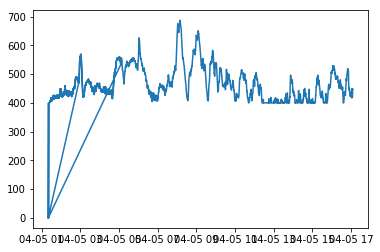

In [98]:
plt.plot(ts_idt, values_idt)

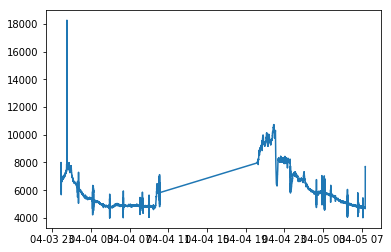

In [136]:
plt.plot(ts_dsco2, values_dsco2)

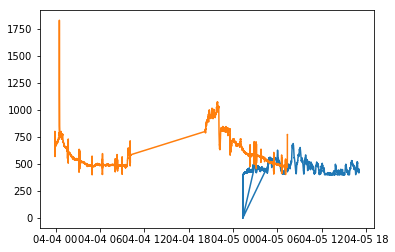

In [139]:
plt.plot(ts_idt, values_idt)
plt.plot(ts_dsco2, values_dsco2)

In [142]:
max_ts = min(max(ts_idt), max(ts_dsco2))
max_ts

Timestamp('2020-04-05 07:22:28.768040895')

In [145]:
min_ts = max(min(ts_idt), min(ts_dsco2))
min_ts

Timestamp('2020-04-05 01:20:31.333000')